In [39]:
#importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
# from imblearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [101]:
#Networks

#ler csv

# -away
ager = pd.read_csv("analitics/network_Germany_away.csv")
aita = pd.read_csv("analitics/network_Italy_away.csv")
aeng = pd.read_csv("analitics/network_England_away.csv")
afra = pd.read_csv("analitics/network_France_away.csv")
aspa = pd.read_csv("analitics/network_Spain_away.csv")
aeur = pd.read_csv("analitics/network_European_Championship_away.csv")
acup = pd.read_csv("analitics/network_World_Cup_away.csv")

# -home
hger  = pd.read_csv("analitics/network_Germany_home.csv")
hita  = pd.read_csv("analitics/network_Italy_home.csv")
heng  = pd.read_csv("analitics/network_England_home.csv")
hfra  = pd.read_csv("analitics/network_France_home.csv")
hspa  = pd.read_csv("analitics/network_Spain_home.csv")
heur  = pd.read_csv("analitics/network_European_Championship_home.csv")
hcup  = pd.read_csv("analitics/network_World_Cup_home.csv")



In [91]:
aspa.head()

,matchID,team1_ID,team2_ID,date,tournament,avg_closeness_centrality_T2,std_closeness_centrality_T2,avg_degree_centrality_T2,std_degree_centrality_T2,avg_betweenness_centrality_T2,std_betweenness_centrality_T2,avg_eigenvector_centrality_T2,std_eigenvector_centrality_T2,avg_clustering_T2,std_clustering_T2,avg_shortest_path_T2,mean_centroid_y_T2,std_centroid_y_T2,mean_centroid_x_T2,std_centroid_x_T2
0,2565922,676,687,"May 20, 2018 at 8:45:00 PM GMT+2",Spain,0.865755,0.104117,1.654545,0.197086,0.019192,0.010178,0.297997,0.045898,0.839136,0.037572,1.172727,51.229380,21.038391,43.467324,15.222294
1,2565919,678,691,"May 20, 2018 at 4:15:00 PM GMT+2",Spain,0.831517,0.092994,1.563636,0.226727,0.024242,0.012895,0.297402,0.049608,0.800511,0.034883,1.218182,50.733711,20.430547,41.825280,13.288984
2,2565924,674,677,"May 20, 2018 at 12:00:00 PM GMT+2",Spain,0.804240,0.095553,1.472727,0.252590,0.029293,0.013502,0.293613,0.068559,0.765315,0.033967,1.263636,45.106644,21.706679,42.865757,16.282654
3,2565920,680,696,"May 19, 2018 at 6:30:00 PM GMT+2",Spain,0.801289,0.108021,1.472727,0.298758,0.030303,0.018373,0.294293,0.065579,0.803203,0.064874,1.272727,49.621432,19.514549,47.471575,16.161453
4,2565921,683,698,"May 19, 2018 at 6:30:00 PM GMT+2",Spain,0.858153,0.117846,1.618182,0.247967,0.021212,0.017868,0.294868,0.062945,0.837383,0.041020,1.190909,49.951472,22.800032,48.582693,15.902277


In [5]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.drop(cols, axis=1)
    group = group.dropna(subset=new_cols)

    return group

In [102]:
cols = ['avg_closeness_centrality_T1', 'std_closeness_centrality_T1', 'avg_degree_centrality_T1', 'std_degree_centrality_T1', 'avg_betweenness_centrality_T1', 
        'std_betweenness_centrality_T1', 'avg_eigenvector_centrality_T1', 'std_eigenvector_centrality_T1', 'avg_clustering_T1', 'std_clustering_T1', 
        'avg_shortest_path_T1', 'mean_centroid_y_T1', 'std_centroid_y_T1', 'mean_centroid_x_T1', 'std_centroid_x_T1']
new_cols = [f"avg_{c}" for c in cols]

heng = heng.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heng = heng.droplevel('team1_ID')
hger = hger.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hger = hger.droplevel('team1_ID')
hita = hita.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hita = hita.droplevel('team1_ID')
hfra = hfra.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hfra = hfra.droplevel('team1_ID')
hspa = hspa.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hspa = hspa.droplevel('team1_ID')
heur = heur.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heur = heur.droplevel('team1_ID')
hcup = hcup.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hcup = hcup.droplevel('team1_ID')

In [103]:
cols = ['avg_closeness_centrality_T2', 'std_closeness_centrality_T2', 'avg_degree_centrality_T2', 'std_degree_centrality_T2', 'avg_betweenness_centrality_T2', 
        'std_betweenness_centrality_T2', 'avg_eigenvector_centrality_T2', 'std_eigenvector_centrality_T2', 'avg_clustering_T2', 'std_clustering_T2', 
        'avg_shortest_path_T2', 'mean_centroid_y_T2', 'std_centroid_y_T2', 'mean_centroid_x_T2', 'std_centroid_x_T2']
new_cols = [f"avg_{c}" for c in cols]

aeng = aeng.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeng = aeng.droplevel('team2_ID')
ager = ager.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
ager = ager.droplevel('team2_ID')
aita = aita.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aita = aita.droplevel('team2_ID')
afra = afra.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
afra = afra.droplevel('team2_ID')
aspa = aspa.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aspa = aspa.droplevel('team2_ID')
aeur = aeur.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeur = aeur.droplevel('team2_ID')
acup = acup.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
acup = acup.droplevel('team2_ID')

In [104]:
avg_ger = hger.merge(ager, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_ita = hita.merge(aita, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eng = heng.merge(aeng, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_fra = hfra.merge(afra, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_spa = hspa.merge(aspa, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eur = heur.merge(aeur, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_cup = hcup.merge(acup, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])


In [132]:
avg_ger.to_csv('rolling_avg/net_avg_ger.csv', encoding='utf-8', index=False)
avg_ita.to_csv('rolling_avg/net_avg_ita.csv', encoding='utf-8', index=False)
avg_eng.to_csv('rolling_avg/net_avg_eng.csv', encoding='utf-8', index=False)
avg_fra.to_csv('rolling_avg/net_avg_fra.csv', encoding='utf-8', index=False)
avg_spa.to_csv('rolling_avg/net_avg_spa.csv', encoding='utf-8', index=False)
avg_eur.to_csv('rolling_avg/net_avg_eur.csv', encoding='utf-8', index=False)
avg_cup.to_csv('rolling_avg/net_avg_cup.csv', encoding='utf-8', index=False)

In [105]:
avg_df = pd.concat([avg_ger, avg_ita, avg_eng, avg_fra, avg_spa, avg_eur, avg_cup], ignore_index=True)

In [106]:
avg_df.groupby('tournament').count()

,matchID,team1_ID,team2_ID,date,winner,avg_avg_closeness_centrality_T1,avg_std_closeness_centrality_T1,avg_avg_degree_centrality_T1,avg_std_degree_centrality_T1,avg_avg_betweenness_centrality_T1,avg_std_betweenness_centrality_T1,avg_avg_eigenvector_centrality_T1,avg_std_eigenvector_centrality_T1,avg_avg_clustering_T1,avg_std_clustering_T1,avg_avg_shortest_path_T1,avg_mean_centroid_y_T1,avg_std_centroid_y_T1,avg_mean_centroid_x_T1,avg_std_centroid_x_T1,avg_avg_closeness_centrality_T2,avg_std_closeness_centrality_T2,avg_avg_degree_centrality_T2,avg_std_degree_centrality_T2,avg_avg_betweenness_centrality_T2,avg_std_betweenness_centrality_T2,avg_avg_eigenvector_centrality_T2,avg_std_eigenvector_centrality_T2,avg_avg_clustering_T2,avg_std_clustering_T2,avg_avg_shortest_path_T2,avg_mean_centroid_y_T2,avg_std_centroid_y_T2,avg_mean_centroid_x_T2,avg_std_centroid_x_T2
tournament,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
England,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207
France,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210
Germany,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162
Italy,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222
Spain,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222
World_Cup,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [115]:
#Separando dados e target
X = avg_df.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_df['winner'] 
col_names = X.columns
idx = avg_df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)


In [108]:
#Métricas de avaliação
def evaluation_metrics(clf,test_x, test_y, pred_y, ax_1, ax_2):
    accuracy = accuracy_score(test_y, pred_y)
    precision = precision_score(test_y, pred_y)
    recall = recall_score(test_y, pred_y)
    f1 = f1_score(test_y, pred_y)
        
    plot_precision_recall_curve(clf, test_x, test_y, ax=ax_1)
    plot_roc_curve(clf, test_x, test_y, ax=ax_2)
    
    return accuracy, precision, recall, f1

In [109]:
def testa_modelos(train_x, train_y, test_x, test_y):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))

    for clf, name in [(rf, 'RandomForest'),
                      (logi, 'LogisticRegression'),
                      (xgb, 'XGBClassifier')]:
        
        clf.fit(train_x, train_y)
        y_pred = clf.predict(test_x)

        accuracy, precision, recall, f1 = evaluation_metrics(clf, test_x, test_y, y_pred, ax1, ax2)
        print(f"{name}: accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
    
    ax1.legend(loc="right")
    ax1.set_title('Precision-Recall curve')
    
    ax2.legend(loc="right")
    ax2.set_title('ROC AUC curve')

In [110]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    random_state=42,
    class_weight='balanced',
    n_jobs = -1)

logi = LogisticRegression(
    penalty='l2', 
    solver='liblinear', 
    max_iter=100, 
    class_weight='balanced')

xgb = XGBClassifier(
    learning_rate=0.05,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    scale_pos_weight=10)

RandomForest: accuracy: 63.96% | precision: 70.16% | recall: 71.28% | f1: 70.71%
LogisticRegression: accuracy: 60.06% | precision: 69.70% | recall: 61.17% | f1: 65.16%
XGBClassifier: accuracy: 64.61% | precision: 63.48% | recall: 98.94% | f1: 77.34%


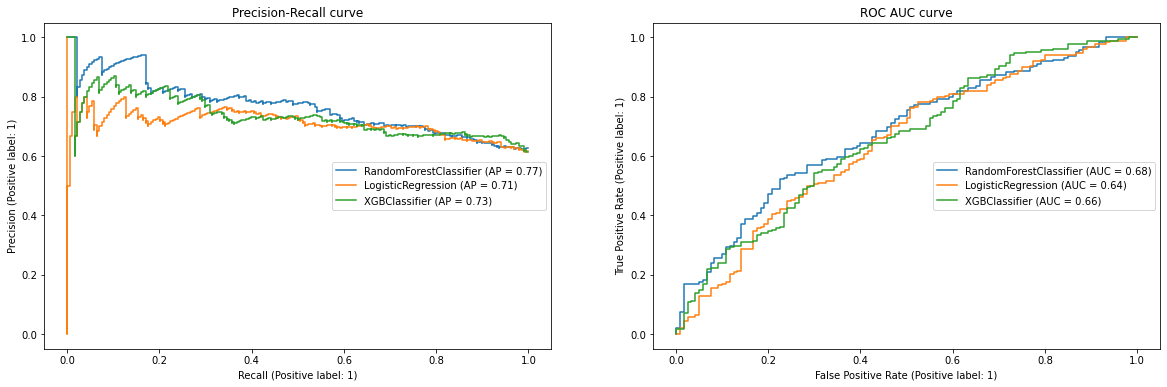

In [111]:
testa_modelos(X_train, y_train, X_test, y_test)

In [114]:
#Achando melhores hiperparâmetros com hyperopt para logistic regression
           
#Define Parameter Space for Optimization
space = {
    'C': hp.choice('C', [0.001, 0.01, 0.1, 1, 10, 100, 1000]),
    'penalty': hp.choice('penalty', ['l1']),
    'max_iter': hp.quniform('max_iter', 100, 700, 100),
    'solver': hp.choice('solver', ['liblinear', 'saga']), #tirei 'lbfgs' e'sag' pq não funciona com l1
    'class_weight' : hp.choice('class_weight', ['balanced', None])
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    clf = LogisticRegression(**params, random_state=42, n_jobs=-1)
    f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1', error_score='raise').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 10/10 [00:16<00:00,  1.70s/trial, best loss: -0.7452018303991607]
Best: {'C': 2, 'class_weight': 1, 'max_iter': 300.0, 'penalty': 0, 'solver': 1}


In [125]:
#Achando melhores hiperparâmetros com hyperopt para Random Forest

#Define Parameter Space for Optimization
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500]),
    "max_depth": hp.quniform("max_depth", 2, 24, 2),
    "max_features": hp.choice("max_features", ['auto', 'sqrt', 'log2']),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "min_samples_leaf":hp.choice("min_samples_leaf", [1, 2, 3, 4, 5]),
    "min_samples_split":hp.choice("min_samples_split", [2, 3, 4, 5, 6]),
    "class_weight": hp.choice("class_weight", ['balanced', 'balanced_subsample', None]),
    "bootstrap": hp.choice("bootstrap", [True, False])
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    model = RandomForestClassifier(**params, n_jobs=-1)
    f1 = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy', error_score='raise').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 10/10 [00:39<00:00,  3.90s/trial, best loss: -0.634489121989122]
Best: {'bootstrap': 0, 'class_weight': 2, 'criterion': 1, 'max_depth': 16.0, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 1, 'n_estimators': 4}


CrossValMean: 0.6275058275058274
CrossValSTD: 0.04612595104841573
accuracy: 64.61% | precision: 66.12% | recall: 86.17% | f1: 74.83%


Text(0.5, 1.0, 'ROC AUC curve')

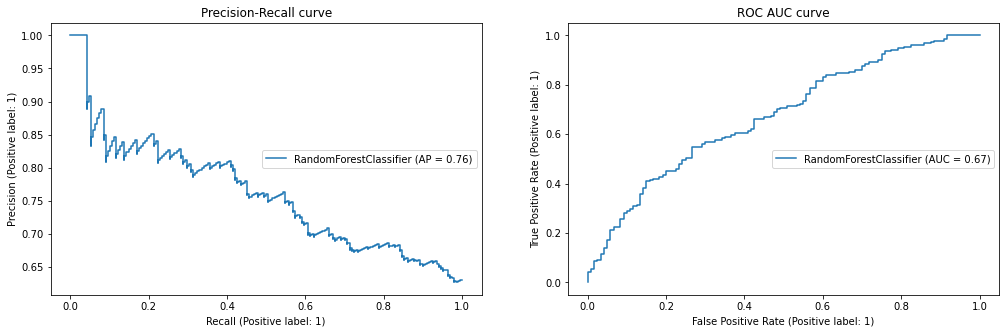

In [128]:
clf = RandomForestClassifier(
    n_estimators=[100, 200, 300, 400,500][3],
    max_depth=best['max_depth'],
    max_features=['auto', 'sqrt', 'log2'][best['max_features']],
    criterion=["gini", "entropy"][best['criterion']],
    min_samples_leaf=[1, 2, 3, 4, 5][best['min_samples_leaf']],
    min_samples_split=[2, 3, 4, 5, 6][best['min_samples_split']],
    random_state=42,
    class_weight=['balanced', 'balanced_subsample', None][best['class_weight']],
    bootstrap=[True, False][best['bootstrap']],
    n_jobs = -1)

cv = cross_val_score(clf,X_train,y_train, cv = 5 , scoring='accuracy')

CrossValMean = cv.mean()
print("CrossValMean:", CrossValMean)
CrossValSTD = cv.std()
print("CrossValSTD:", CrossValSTD)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,5))
accuracy, precision, recall, f1 = evaluation_metrics(clf, X_test ,y_test, y_pred, ax1, ax2)
print(f"accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
ax1.legend(loc="right")
ax1.set_title('Precision-Recall curve')

ax2.legend(loc="right")
ax2.set_title('ROC AUC curve')

In [130]:
#Achando melhores hiperparâmetros com hyperopt para XGBoosting

#Define Parameter Space for Optimization
space = {
 'max_depth' : hp.choice('max_depth', range(5, 15, 1)),
 'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
 'n_estimators' : hp.choice('n_estimators', range(50, 400, 10)),
 'gamma' : hp.quniform('gamma', 0, 0.30, 0.01),
 'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
 'subsample' : hp.quniform('subsample', 0.1, 1, 0.05),
 'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
 'scale_pos_weight' : hp.choice('scale_pos_weight', range(4, 25, 1)),
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    clf = XGBClassifier(**params, random_state=42, verbosity=0, objective= 'binary:logistic', n_jobs=-1)
    f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 10/10 [00:09<00:00,  1.05trial/s, best loss: -0.613646076146076]
Best: {'colsample_bytree': 0.62, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 7.0, 'n_estimators': 23, 'scale_pos_weight': 6, 'subsample': 0.8}


CrossValMean: 0.608003108003108
CrossValSTD: 0.031103150394971434
accuracy: 60.39% | precision: 62.99% | recall: 85.11% | f1: 72.40%


Text(0.5, 1.0, 'ROC AUC curve')

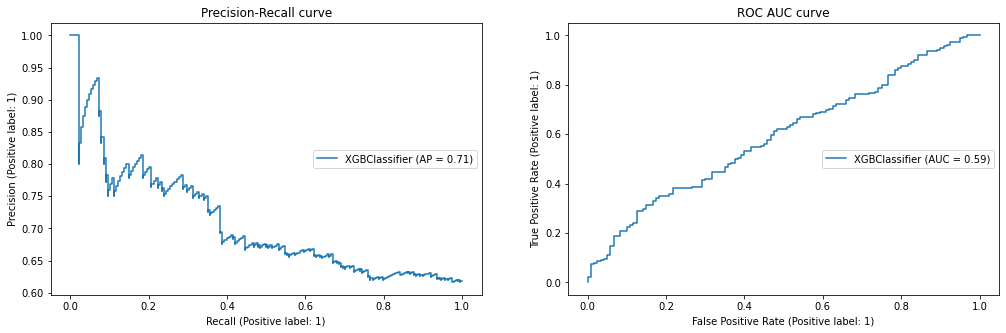

In [131]:
clf = XGBClassifier(
    learning_rate=best['learning_rate'],
    n_estimators=range(50, 400, 10)[best['n_estimators']],
    max_depth=range(5, 15, 1)[best['max_depth']],
    min_child_weight=best['min_child_weight'],
    gamma=best['gamma'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    objective= 'binary:logistic',
    scale_pos_weight=range(4, 25, 1)[best['scale_pos_weight']])

cv = cross_val_score(clf,X_train,y_train, cv = 5 , scoring='accuracy')

CrossValMean = cv.mean()
print("CrossValMean:", CrossValMean)
CrossValSTD = cv.std()
print("CrossValSTD:", CrossValSTD)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,5))
accuracy, precision, recall, f1 = evaluation_metrics(clf, X_test ,y_test, y_pred, ax1, ax2)
print(f"accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
ax1.legend(loc="right")
ax1.set_title('Precision-Recall curve')

ax2.legend(loc="right")
ax2.set_title('ROC AUC curve')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

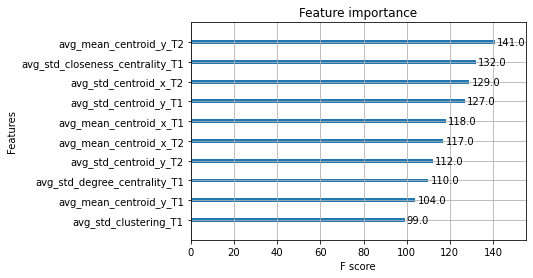

In [38]:
#Feature importance do modelo escolhido
plot_importance(clf, max_num_features = 10)

# Treinar por campeonatos

## England

RandomForest: accuracy: 69.84% | precision: 72.92% | recall: 85.37% | f1: 78.65%
LogisticRegression: accuracy: 61.90% | precision: 74.29% | recall: 63.41% | f1: 68.42%
XGBClassifier: accuracy: 66.67% | precision: 67.86% | recall: 92.68% | f1: 78.35%


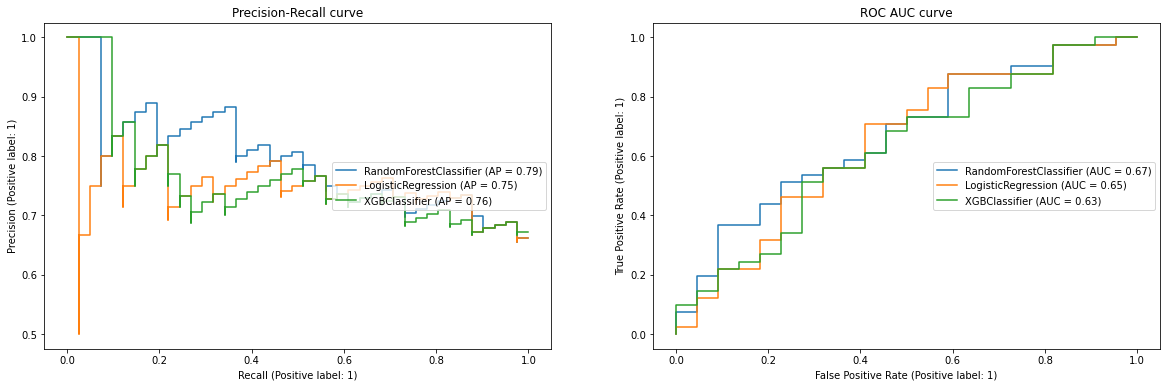

In [86]:
#Separando dados e target
X = avg_eng.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_eng['winner'] 
col_names = X.columns
idx = avg_df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)

testa_modelos(X_train, y_train, X_test, y_test)

## France

RandomForest: accuracy: 61.90% | precision: 67.44% | recall: 74.36% | f1: 70.73%
LogisticRegression: accuracy: 61.90% | precision: 69.23% | recall: 69.23% | f1: 69.23%
XGBClassifier: accuracy: 63.49% | precision: 63.79% | recall: 94.87% | f1: 76.29%


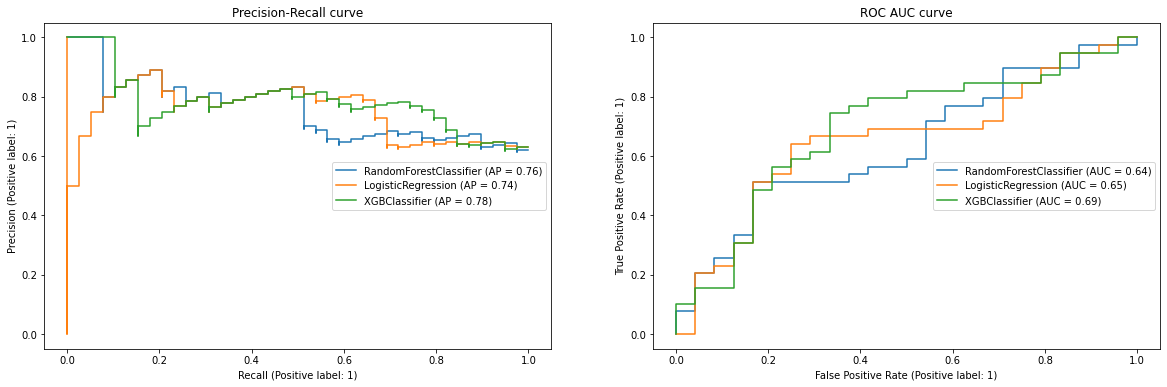

In [87]:
#Separando dados e target
X = avg_fra.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_fra['winner'] 
col_names = X.columns
idx = avg_df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)

testa_modelos(X_train, y_train, X_test, y_test)

## Germany

RandomForest: accuracy: 53.06% | precision: 59.38% | recall: 65.52% | f1: 62.30%
LogisticRegression: accuracy: 44.90% | precision: 55.00% | recall: 37.93% | f1: 44.90%
XGBClassifier: accuracy: 65.31% | precision: 65.00% | recall: 89.66% | f1: 75.36%


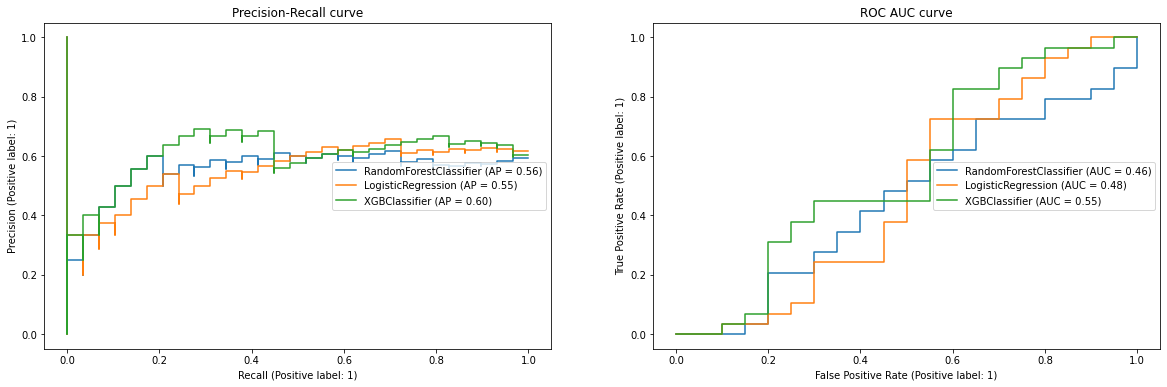

In [88]:
#Separando dados e target
X = avg_ger.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_ger['winner'] 
col_names = X.columns
idx = avg_df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)

testa_modelos(X_train, y_train, X_test, y_test)

## Italy

RandomForest: accuracy: 61.19% | precision: 63.41% | recall: 70.27% | f1: 66.67%
LogisticRegression: accuracy: 64.18% | precision: 69.70% | recall: 62.16% | f1: 65.71%
XGBClassifier: accuracy: 61.19% | precision: 61.22% | recall: 81.08% | f1: 69.77%


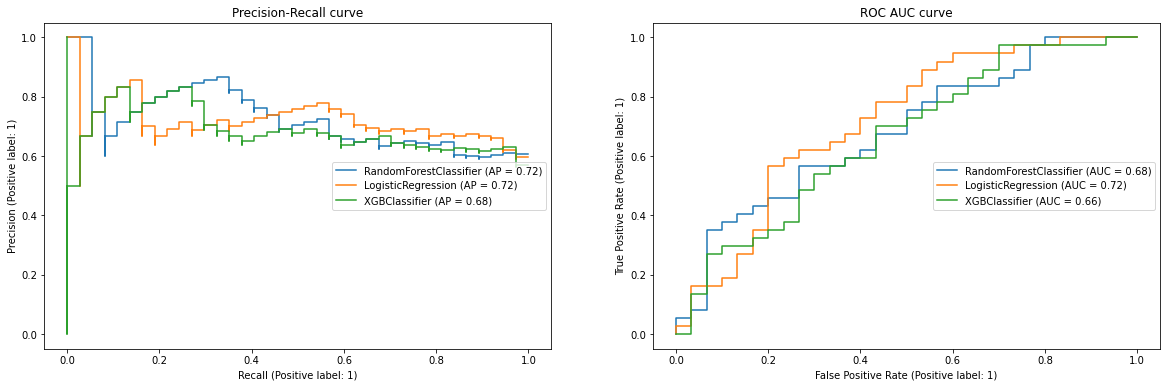

In [89]:
#Separando dados e target
X = avg_ita.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_ita['winner'] 
col_names = X.columns
idx = avg_df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)

testa_modelos(X_train, y_train, X_test, y_test)

## Spain

In [ ]:
#Separando dados e target
X = avg_.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_ita['winner'] 
col_names = X.columns
idx = avg_df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)

testa_modelos(X_train, y_train, X_test, y_test)

# Clustering

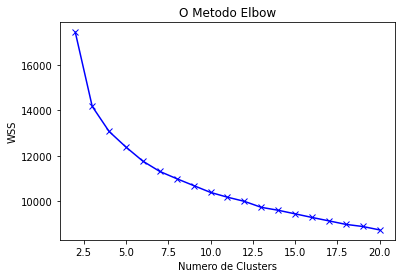

In [59]:
# Clustering

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2
# y_pca = X['winner']
# x_pca = X.drop(['winner'], axis=1)
wcss = calculate_wcss(X_pca)
plt.figure(figsize=(6,4))
plt.plot(range(2, 21), wcss, 'bx-')
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [60]:
best_n_cluster = optimal_number_of_clusters(wcss)
best_n_cluster

6

For n_clusters = 2 The average silhouette_score is : 0.18650600054660993
For n_clusters = 3 The average silhouette_score is : 0.19186352035445284
For n_clusters = 4 The average silhouette_score is : 0.14919752835108746
For n_clusters = 5 The average silhouette_score is : 0.12234233609851489
For n_clusters = 6 The average silhouette_score is : 0.11438466472204654
For n_clusters = 7 The average silhouette_score is : 0.10964944861510569


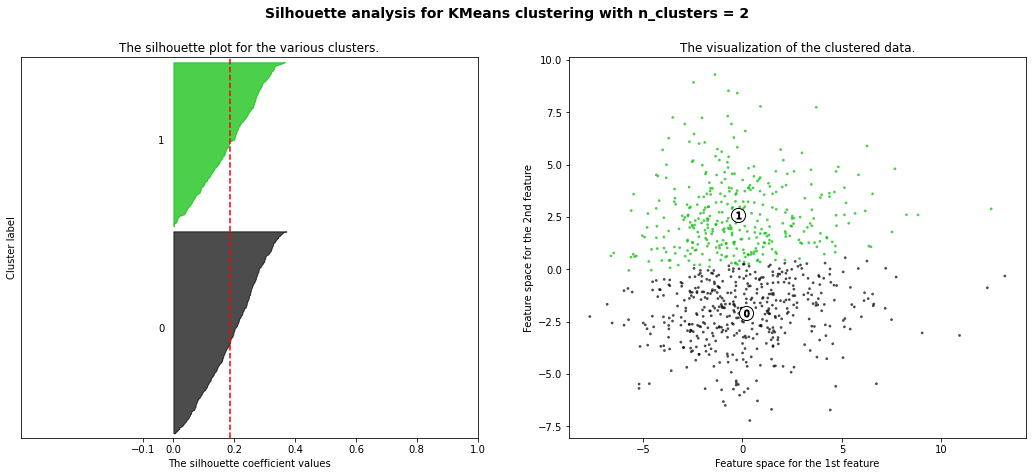

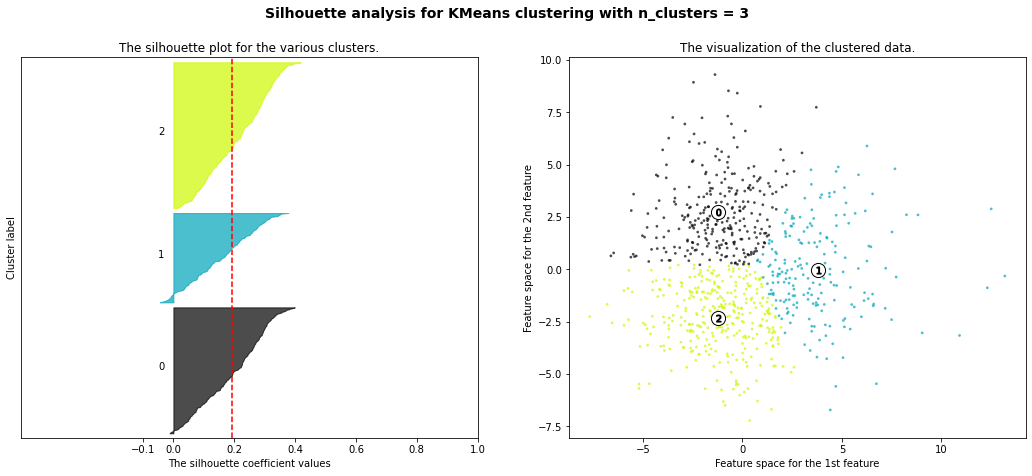

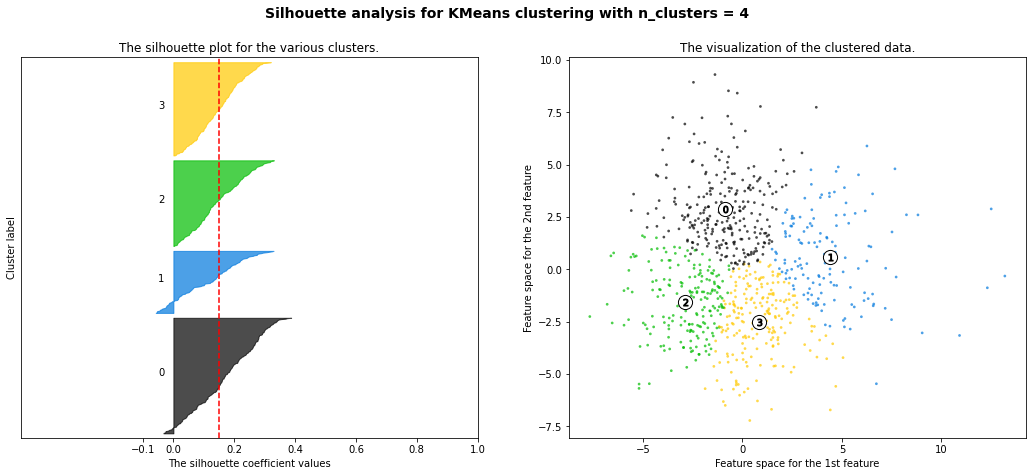

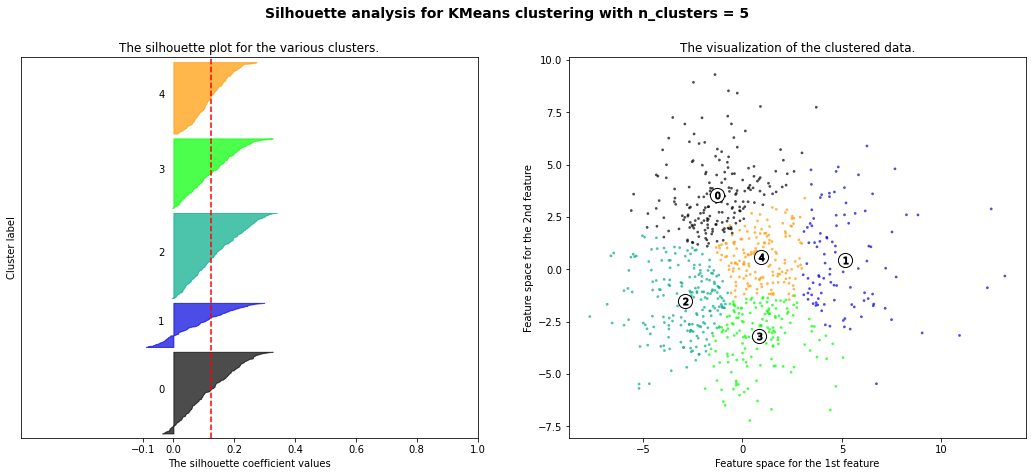

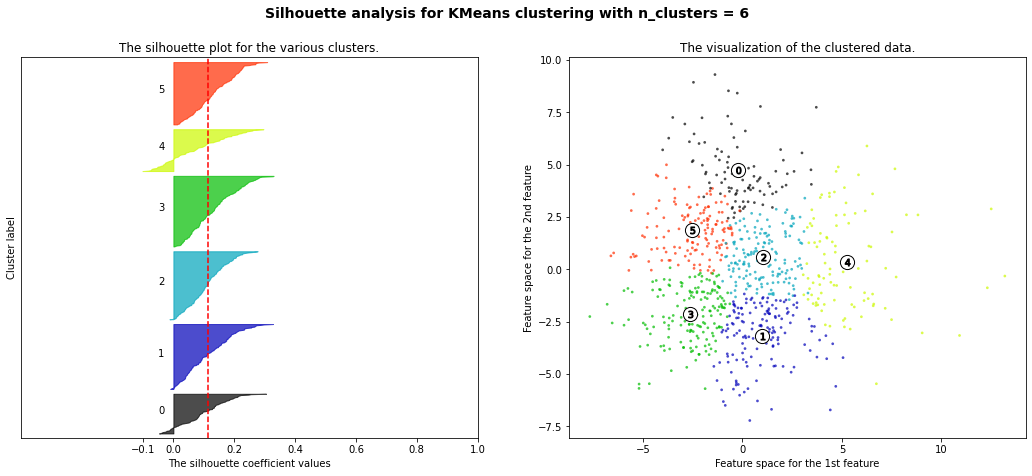

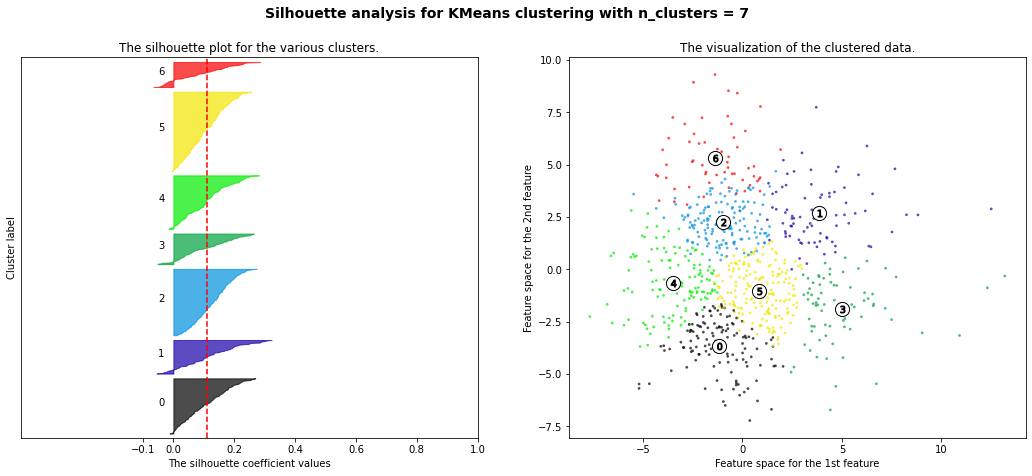

In [62]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

sc_df = pd.DataFrame(data = XScaled, columns=col_names)

pca_df.drop(['tournament'], axis=1, inplace=True)

for n_clusters in range(2, 8):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.5, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, 
    # to demarcate them clearly.
    ax1.set_ylim([0, len(pca_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pca_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

plt.show()

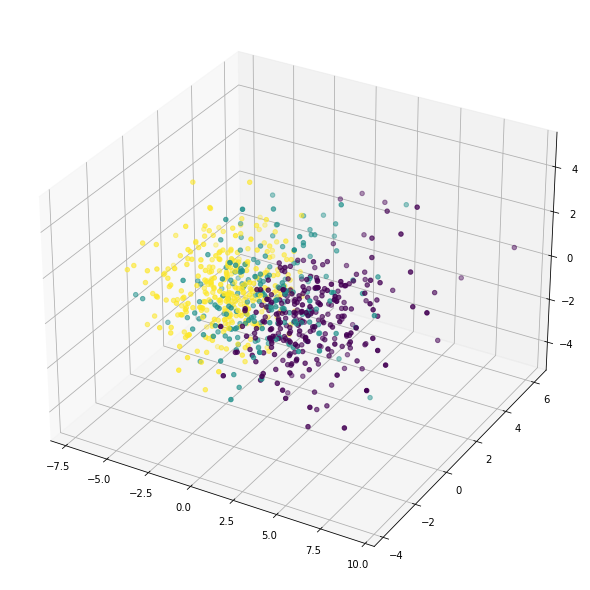

In [78]:
df_merge_col_values = pd.DataFrame(pca_df).values

kmeans = KMeans(n_clusters = 3, n_jobs = -1, max_iter= 400)
kmeans = kmeans.fit(pca_df)
k_means_predicted = kmeans.predict(pca_df)

# Getting the cluster centers
C = kmeans.cluster_centers_
# Getting the distance
distance = kmeans.fit_transform(pca_df)
# Getting the labels
labels = kmeans.labels_
# Plotando
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.scatter(df_merge_col_values[:, 1], df_merge_col_values[:, 2], df_merge_col_values[:,3], c=k_means_predicted)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='', s=1000)
plt.show()

In [81]:
# Marcar a previsão = 1
k_means_predicted = pd.DataFrame(k_means_predicted)
# Inserir na base full
X_kmeans = pca_df.copy()
X_kmeans['cluster'] = k_means_predicted
X_kmeans['tournament'] = avg_df['tournament']

In [82]:
X_kmeans.groupby(['cluster', 'tournament']).count()

PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
cluster tournament                                                         
0       England      78   78   78   78   78   78   78   78   78    78    78
        France       77   77   77   77   77   77   77   77   77    77    77
        Germany      40   40   40   40   40   40   40   40   40    40    40
        Italy        85   85   85   85   85   85   85   85   85    85    85
1       England      67   67   67   67   67   67   67   67   67    67    67
        France       64   64   64   64   64   64   64   64   64    64    64
        Germany      17   17   17   17   17   17   17   17   17    17    17
        Italy        51   51   51   51   51   51   51   51   51    51    51
        World_Cup     1    1    1    1    1    1    1    1    1     1     1
2       England      62   62   62   62   62   62   62   62   62    62    62
        France       69   69   69   69   69   69   69   69   69    69    69
        Germany     105  105  105  105  105  105  105  105  105   105   105
        Italy        86   86   86   86   86   86   86   86   86    86    86
        World_Cup     1    1    1    1    1    1    1    1    1     1     1

# PCA

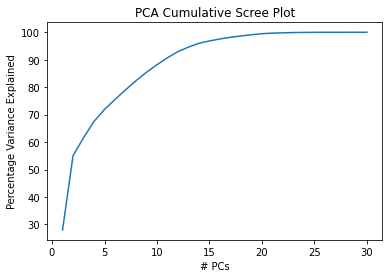

In [51]:
# PCA

pca = PCA()
pca.fit(XScaled)
X_pca = pca.fit_transform(XScaled)

y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,len(pca.explained_variance_)+1)
plt.plot(x,y)
plt.ylabel('Percentage Variance Explained')
plt.xlabel('# PCs')
plt.title('PCA Cumulative Scree Plot')
plt.show()

In [53]:
np.cumsum(pca.explained_variance_ratio_)


array([0.28025709, 0.55056424, 0.61581222, 0.67540007, 0.71905534,
       0.75523779, 0.790132  , 0.82341174, 0.85431676, 0.8818454 ,
       0.90711992, 0.92950235, 0.9460003 , 0.95984274, 0.96832178,
       0.97559581, 0.98170555, 0.98644981, 0.99076604, 0.99471567,
       0.99671636, 0.99788063, 0.99883087, 0.99940662, 0.99963409,
       0.99984126, 0.99989349, 0.99993373, 0.99997044, 1.        ])

In [52]:
#Escolho o número de componentes baseado na variância acumalada desejada
cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >= 0.9) + 1
d

11

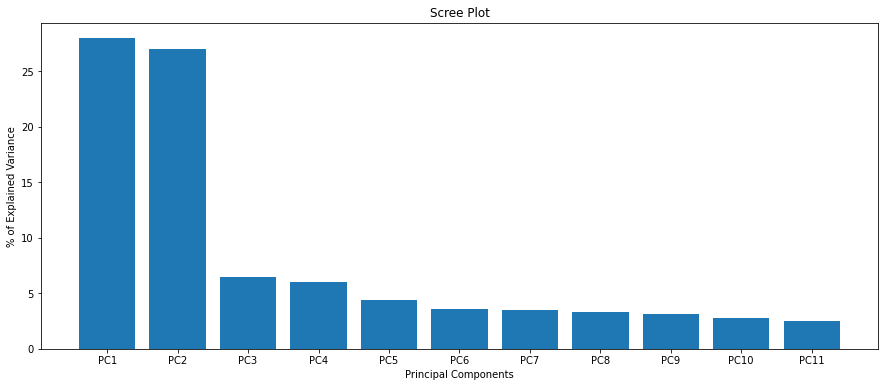

In [55]:
pca = PCA(n_components=d)
pca.fit(XScaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

X_pca = pca.fit_transform(XScaled)
pca_df = pd.DataFrame(data = X_pca, columns=labels)
pca_df['tournament'] = avg_df['tournament']

plt.figure(figsize = (15, 6))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [56]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,tournament
0,1.041339,-1.344676,-2.531756,1.026661,-1.243004,0.474326,-0.156322,-1.523381,0.706927,-1.192595,-0.837902,Germany
1,2.995142,5.560238,0.500768,1.814596,0.268074,0.483542,-1.087018,-0.228167,0.647667,-1.206461,-0.992687,Germany
2,1.125141,1.251286,-0.461872,0.606158,1.267381,-0.198747,-0.249442,-0.404756,0.926749,-1.670840,-0.792610,Germany
3,-0.411687,-1.684839,-2.924633,-0.036838,2.327444,0.688996,-0.828579,1.454953,0.736562,-0.761680,-0.549795,Germany
4,-2.170608,-4.064538,-1.569617,0.799136,2.772928,0.920901,-0.625889,1.688534,1.466971,-1.041357,-0.011246,Germany


avg_avg_degree_centrality_T1        -0.333212
avg_avg_betweenness_centrality_T1    0.331894
avg_avg_shortest_path_T1             0.329406
avg_avg_closeness_centrality_T1     -0.327908
avg_std_betweenness_centrality_T1    0.318955
avg_std_eigenvector_centrality_T1    0.312999
avg_avg_clustering_T1               -0.303763
avg_avg_eigenvector_centrality_T1   -0.301478
avg_std_clustering_T1                0.239792
avg_std_closeness_centrality_T1      0.215004
dtype: float64


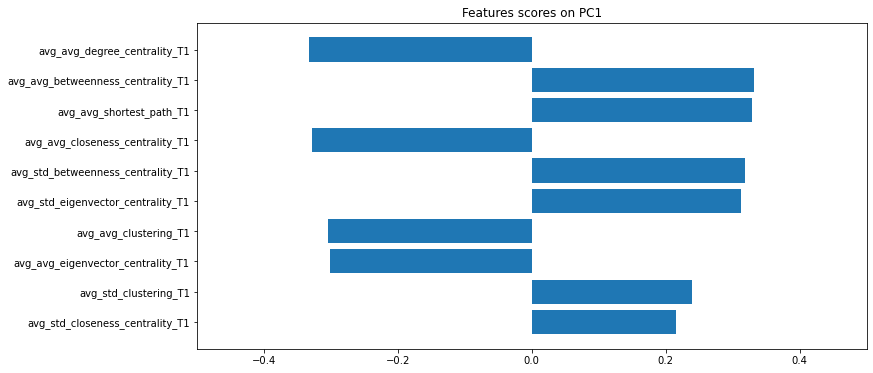

In [58]:
## get the name of the top 10 measurements that contribute most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=X.columns)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 features
top_10_features = sorted_loading_scores[:10].index.values
 
print(loading_scores[top_10_features])

plt.figure(figsize = (12, 6))
plt.xlim([-0.5, 0.5])
plt.barh(top_10_features[::-1], loading_scores[top_10_features][::-1])
plt.title('Features scores on PC1')
plt.show()